# Observed patterns in atmospheric CO<sub>2</sub>

We use observations from nine deployments of three recent aircraft projects: the HIAPER Pole-to-Pole Observations (HIPPO) project {cite:p}`Wofsy2011-zm`; the O<sub>2</sub>/N<sub>2</sub> Ratio and CO<sub>2</sub> Airborne Southern Ocean (ORCAS) study {cite:p}`Stephens2018-be`; and the Atmospheric Tomography (ATom) mission {cite:p}`Wofsy2018-oo`. 


We also examined 44 atmospheric CO<sub>2</sub> records from surface monitoring stations in the high-latitude Southern Hemisphere, selecting and filtering the highest quality data. 

This notebook creates a figure summarizing these data. Additional details are provided in other notebooks:
- [Airborne observations](obs-aircraft.ipynb)
- [Surface observations](obs-surface.ipynb)
- [Error analysis for surface observations](obs-surface-error.ipynb)
- [Evaluation of diurnal variations in surface data](obs-surface-diurnal-variations.ipynb)
- [Simulated distributions of CO<sub>2</sub>](obs-simulated-distributions.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

import util
import figure_panels
import datasets

## Load obervational datasets

Here we make use of functions provided by the `datasets` module; see [API documentation](api-datasets.rst) for additional details.

In [3]:
%%time
dsets = dict(
    ds_obs_aircraft=datasets.aircraft_sections(),
    ds_obs_srf_djf=datasets.obs_surface_stn_v_lat('djf'),
    ds_obs_srf_jja=datasets.obs_surface_stn_v_lat('jja'),
)
dsets

CPU times: user 317 ms, sys: 10.2 ms, total: 327 ms
Wall time: 329 ms


{'ds_obs_aircraft': <xarray.Dataset>
 Dimensions:       (z: 22, y: 20, time: 9, ye: 20, ze: 23)
 Coordinates:
     ALT           (z, y) float64 0.25 0.25 0.25 0.25 ... 10.75 10.75 10.75 10.75
     LAT           (z, y) float64 -78.75 -76.25 -73.75 ... -36.25 -33.75 -31.25
     campaigns     (time) <U7 'HIPPO-1' 'HIPPO-2' 'HIPPO-3' ... 'ATOM-3' 'ATOM-4'
     month         (time) int64 1 11 4 8 2 8 2 10 5
   * time          (time) datetime64[ns] 2009-01-20 2009-11-11 ... 2018-05-07
   * y             (y) float64 -78.75 -76.25 -73.75 ... -36.25 -33.75 -31.25
   * ye            (ye) float64 -80.0 -77.5 -75.0 -72.5 ... -37.5 -35.0 -32.5
     year          (time) int64 2009 2009 2010 2011 2016 2016 2017 2017 2018
   * z             (z) float64 0.25 0.75 1.25 1.75 2.25 ... 9.25 9.75 10.25 10.75
   * ze            (ze) float64 0.0 0.5 1.0 1.5 2.0 ... 9.0 9.5 10.0 10.5 11.0
 Data variables:
     CO2_binned    (time, z, y) float64 nan nan nan nan ... 406.0 405.9 405.6
     DCO2_binned   (time, z,

## Fig. 1: Observed CO<sub>2</sub> distributions over the Southern Ocean 

CPU times: user 2.19 s, sys: 43.3 ms, total: 2.23 s
Wall time: 2.32 s


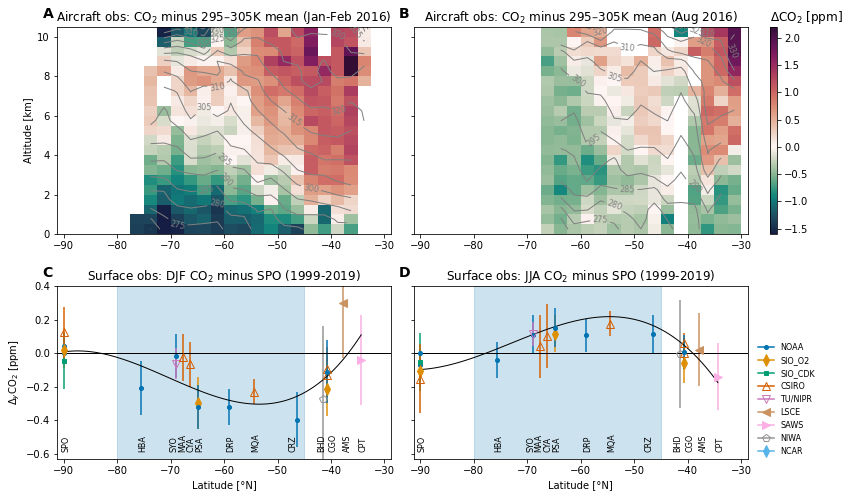

In [4]:
%%time
# set up canvas
fig = plt.figure(figsize=(10, 6)) #dpi=300)

# set up plot grid
gs_top = gridspec.GridSpec(nrows=1, ncols=3, 
                        width_ratios=(1, 1, 0.02), 
                        left=0, right=1, bottom=0.52, top=1.,
                        hspace=0.2, wspace=0.1,
                       )

gs_bot = gridspec.GridSpec(nrows=1, ncols=3, 
                        width_ratios=(1, 1, 0.02), 
                        left=0, right=1, bottom=0, top=0.4,
                        hspace=0.2, wspace=0.1,
                       )

axs = dict(
    section_DJF=plt.subplot(gs_top[0, 0]),
    section_JJA=plt.subplot(gs_top[0, 1]),
    surface_DJF=plt.subplot(gs_bot[0, 0]),
    surface_JJA=plt.subplot(gs_bot[0, 1]),        
)
caxs = dict(
    section=plt.subplot(gs_top[:, -1]),
)

#------------------------------------
#--- ORCAS Section
#------------------------------------

ds = dsets['ds_obs_aircraft']
ax = axs['section_DJF']

ndx = np.where(ds.campaigns == 'ORCAS')[0][0]
cf = ax.pcolormesh(
        ds.y, ds.z, ds.DCO2_binned.isel(time=ndx).squeeze(),
        norm=figure_panels.divnorm,
        cmap=figure_panels.cmap,
        shading='nearest',    
    )
cs = ax.contour(
    ds.LAT, ds.ALT, ds.THETA.isel(time=ndx).squeeze(),
    levels=np.arange(255., 350., 5.),
    linewidths=1,
    colors='gray')    
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%d')  

ax.set_title('Aircraft obs: CO$_2$ minus 295–305K mean (Jan-Feb 2016)')
ax.set_ylim((0, 10.5))
ax.set_xlim(-91.25, -28.75)
ax.set_ylabel('Altitude [km]')        


#------------------------------------
#--- ATom Section
#------------------------------------

ds = dsets['ds_obs_aircraft']
ax = axs['section_JJA']

ndx = np.where(ds.campaigns == 'ATOM-1')[0][0]
cf = ax.pcolormesh(
        ds.y, ds.z, ds.DCO2_binned.isel(time=ndx).squeeze(),
        norm=figure_panels.divnorm,
        cmap=figure_panels.cmap,
        shading='nearest',
    )
cs = ax.contour(
    ds.LAT, ds.ALT, ds.THETA.isel(time=ndx).squeeze(),
    levels=np.arange(255., 350., 5.),
    linewidths=1,
    colors='gray')    
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%d') 

ax.set_title('Aircraft obs: CO$_2$ minus 295–305K mean (Aug 2016)')
ax.set_ylim((0, 10.5))
ax.set_xlim(-91.25, -28.75)
ax.set_yticklabels([])

cax = caxs['section']
plt.colorbar(cf, cax=cax)
cax.set_title('$\Delta$CO$_2$ [ppm]', loc='left')

#------------------------------------
#--- DJF Surface
#------------------------------------

ds = dsets['ds_obs_srf_djf']
ax = axs[f'surface_DJF']
figure_panels.stn_v_lat(ds.CO2, ax)   
ax.set_ylabel('')
ax.set_title(f'Surface obs: DJF CO$_2$ minus SPO (1999-2019)')
ax.set_xlim(-91.25, -28.75)
ax.set_ylabel('$\Delta_{ y}$CO$_2$ [ppm]')

#------------------------------------
#--- JJA Surface
#------------------------------------

ds = dsets['ds_obs_srf_jja']
ax = axs[f'surface_JJA']
figure_panels.stn_v_lat(ds.CO2, ax)   
ax.set_ylabel('')
ax.set_title(f'Surface obs: JJA CO$_2$ minus SPO (1999-2019)')
ax.set_xlim(-91.25, -28.75)
ax.set_yticklabels([])


marker_spec = figure_panels.marker_spec_co2_inst()
legend_elements = [Line2D([0], [0], label=inst, linestyle=None, **spec) 
                   for inst, spec in marker_spec.items() if inst != 'Multiple']
ax.legend(handles=legend_elements, ncol=1, 
          fontsize=8, loc=(1.02, 0), frameon=False);

plot_keys = [
    'section_DJF', 'section_JJA', 
    'surface_DJF', 'surface_JJA', 
]   
util.label_plots(fig, [axs[k] for k in plot_keys], xoff=-0.02, yoff=0.02)

util.savefig(f'co2-aircraft-surface-obs')

**Observed patterns in atmospheric CO<sub>2</sub> over the Southern Ocean.** Observed patterns in atmospheric CO<sub>2</sub> over the Southern Ocean. Upper panels: Cross-sections observed by aircraft during (A) ORCAS, Jan–Feb 2016 and (B) ATom-1, Aug 2016. Colors show the observed CO<sub>2</sub> dry air mole fraction relative to the average observed within the 295–305 K potential temperature range south of 45°S on each campaign; contour lines show the observed potential temperature.
Fight-tracks and cross-section plots for all campaigns are shown [here](obs-aircraft.ipynb) and [this notebook](obs-simulated-distributions.ipynb) illustrates the distributions of CO<sub>2</sub> simulated by a 3-D transport model.
Lower panels: Compilation of mean CO<sub>2</sub> observed at surface monitoring stations minus the NOAA in situ record at the South Pole Observatory (SPO) over 1999–2019 for (C) summer (DJF) and (D) winter (JJA). 
The black line is a spline fit provided simply as a visual guide. Blue shading denotes the latitude band in which we designate “Southern Ocean stations.” Station locations and temporal coverage are shown [here](obs-surface.ipynb).